In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2,u1,u2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1)+ u1 * ((x1 - L1)**3) - k2 * (x1 - L2-x2)+ u2 *  (x1 - L2-x2)**3) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + u2 * (x2 - x1 - L2)**3 ) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
#Non-linear coefficients
u1=-1.0/6.0
u2=-1.0/10.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.5
y1 = 1/2
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2,u1,u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ej3_2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

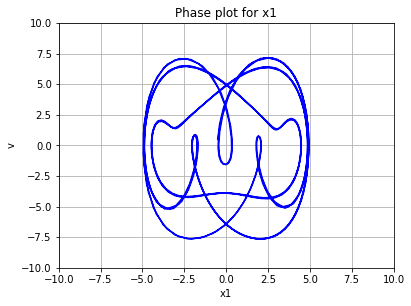

In [3]:
# Plot the solution that was generated

import numpy
import matplotlib.pyplot as plt
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
% matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ej3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x1')
ylabel('v')
grid(True)
#hold(True)
lw = 1.5

plt.xlim(-10,10)
plt.ylim(-10,10)

plot(x1,y1, 'b', linewidth=lw)
        
title('Phase plot for x1')
savefig('ej3_2.1.png', dpi=100)

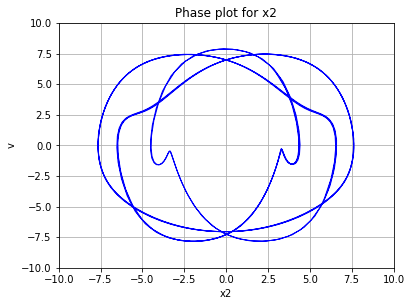

In [4]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
% matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ej3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x2')
ylabel('v')
grid(True)
#hold(True)
lw = 1

plt.xlim(-10,10)
plt.ylim(-10,10)

plot(x2,y2, 'b', linewidth=lw)
                                    
#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot for x2')
savefig('ej3_2.2.png', dpi=100)

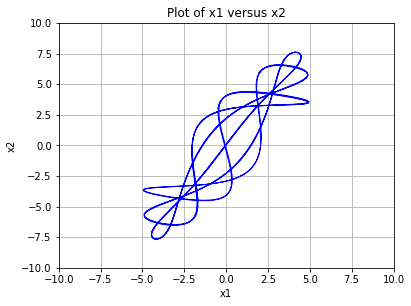

In [5]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
% matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ej3_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x1')
ylabel('x2')
grid(True)
#hold(True)
lw = 1
plt.xlim(-10,10)
plt.ylim(-10,10)

plot(x1,x2, 'b', linewidth=lw)
                                    
#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Plot of x1 versus x2')
savefig('ej3_2.3.png', dpi=100)